In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_excel('ADS.xltx')
#('ADS.csv', encoding='ISO-8859-1')


In [27]:
columns = df.columns
columns_list = df.columns.to_list()
columns_list

['Report ID',
 'Report Version',
 'Reporting Entity',
 'Report Type',
 'Report Month',
 'Report Year',
 'Report Submission Date',
 'VIN',
 'VIN - Unknown',
 'Serial Number',
 'Make',
 'Model',
 'Model - Unknown',
 'Model Year',
 'Model Year - Unknown',
 'Same Vehicle ID',
 'Mileage',
 'Mileage - Unknown',
 'Driver / Operator Type',
 'ADAS/ADS Version',
 'ADAS/ADS Version - Unknown',
 'ADAS/ADS Version CBI',
 'ADS Equipped?',
 'Automation System Engaged?',
 'Operating Entity',
 'Operating Entity - Unknown',
 'Source - Complaint/Claim',
 'Source - Telematics',
 'Source - Law Enforcement',
 'Source - Field Report',
 'Source - Testing',
 'Source - Media',
 'Source - Other',
 'Source - Other Text',
 'Incident Date',
 'Incident Date - Unknown',
 'Notice Received Date',
 'Incident Time (24:00)',
 'Incident Time - Unknown',
 'Same Incident ID',
 'Latitude',
 'Latitude - Unknown',
 'Longitude',
 'Longitude - Unknown',
 'Address',
 'Address - Unknown',
 'City',
 'City - Unknown',
 'State',
 'Zip

In [28]:
#df = df.drop(['Report Month', 'Report Year', 'Report Submission Date', 'VIN - Unknown', 'Serial Number', 'Model - Unknown', 'Model Year - Unknown'], axis = 1)

In [29]:
df.head(10)

,Report ID,Report Version,Reporting Entity,Report Type,Report Month,Report Year,Report Submission Date,VIN,VIN - Unknown,Serial Number,...,ENTERING/LEAVING RAMP,PREVIOUS COLLISION,UNFAMILIAR WITH ROAD,DEFECTIVE WEH EQUIP (YES/NO),UNINVOLVED VEHICLE,OTHER*.3,NONE APPARENT,RUNAWAY VEHICLE,PROPERTY DAMAGE,Third Vehicle
0,540-5491,1.0,"General Motors, LLC",Monthly,4.0,2023.0,2024-05-23,5G21A6P03N4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,540-5490,1.0,"General Motors, LLC",Monthly,4.0,2023.0,2024-05-23,5G21A6P0XP4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,540-5489,1.0,"General Motors, LLC",Monthly,4.0,2023.0,2024-05-23,5G21A6P04P4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,540-5488,1.0,"General Motors, LLC",Monthly,4.0,2023.0,2024-05-23,5G21A6P09P4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30412-5462,1.0,Cruise LLC,Monthly,4.0,2023.0,2024-05-23,5G21A6P03L4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,30412-5461,1.0,Cruise LLC,Monthly,4.0,2023.0,2024-05-23,5G21A6P03N4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30412-5460,1.0,Cruise LLC,Monthly,4.0,2023.0,2024-05-23,5G21A6P0XP4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,30412-5459,1.0,Cruise LLC,Monthly,4.0,2023.0,2024-05-23,5G21A6P04P4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30412-5458,1.0,Cruise LLC,Monthly,4.0,2023.0,2024-05-23,5G21A6P09P4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,540-5425,3.0,"General Motors, LLC",Update,NaN,NaN,2024-05-23,5G21A6P04N4,,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
unknown_columns = [col for col in df.columns if 'unknown' in col.lower()]
unknown_columns

['VIN - Unknown',
 'Model - Unknown',
 'Model Year - Unknown',
 'Mileage - Unknown',
 'ADAS/ADS Version - Unknown',
 'Operating Entity - Unknown',
 'Incident Date - Unknown',
 'Incident Time - Unknown',
 'Latitude - Unknown',
 'Longitude - Unknown',
 'Address - Unknown',
 'City - Unknown',
 'Zip Code - Unknown',
 'Posted Speed Limit - Unknown',
 'Weather - Unknown',
 'CP Contact Area - Unknown',
 'SV Pre-crash Speed - Unknown',
 'SV Contact Area - Unknown',
 'Data Availability - Unknown',
 'Investigating Agency - Unknown',
 'Inv. Officer Name - Unknown',
 'Inv. Officer Phone - Unknown',
 'Inv. Officer Email - Unknown',
 'Vehicle was: Unknown',
 'Involved in the Accident: Unknown',
 'Vehicle was: Unknown.1',
 'Involved in the Accident: Unknown.1']

In [31]:
source_columns = [col for col in df.columns if 'source' in col.lower()]
source_columns

['Source - Complaint/Claim',
 'Source - Telematics',
 'Source - Law Enforcement',
 'Source - Field Report',
 'Source - Testing',
 'Source - Media',
 'Source - Other',
 'Source - Other Text']

In [32]:
contact_cols = [col for col in df.columns if 'contact' in col.lower()]
contact_cols

['CP Contact Area - Rear Left',
 'CP Contact Area - Left',
 'CP Contact Area - Front Left',
 'CP Contact Area - Rear',
 'CP Contact Area - Top',
 'CP Contact Area - Front',
 'CP Contact Area - Rear Right',
 'CP Contact Area - Right',
 'CP Contact Area - Front Right',
 'CP Contact Area - Bottom',
 'CP Contact Area - Unknown',
 'SV Contact Area - Rear Left',
 'SV Contact Area - Left',
 'SV Contact Area - Front Left',
 'SV Contact Area - Rear',
 'SV Contact Area - Top',
 'SV Contact Area - Front',
 'SV Contact Area - Rear Right',
 'SV Contact Area - Right',
 'SV Contact Area - Front Right',
 'SV Contact Area - Bottom',
 'SV Contact Area - Unknown']

In [33]:
def consolidate_columns(row):
    conditions = [col for col in one_hot_columns if row[col]== 'Y']
    return conditions[0] if conditions else None



In [34]:
one_hot_columns = ['Weather - Clear', 'Weather - Snow', 'Weather - Cloudy', 'Weather - Fog/Smoke', 'Weather - Rain', 'Weather - Severe Wind', 'Weather - Unknown', 'Weather - Other', 'Weather - Other Text', 'CLEAR', 'CLOUDY', 'RAINING', 'SNOWING', 'FOG/VISIBILITY', 'OTHER', 'WIND']
df['Weather Condition'] = df.apply(consolidate_columns, axis=1)

one_hot_columns = ['DAYLIGHT', 'DUSK ‚Äì DAWN', 'DARK ‚Äì STREET LIGHTS', 'DARK ‚Äì NO STREET LIGHTS', 'DARK ‚Äì STREET LIGHTS NOT FUNCTIONING*']
df['Lighting Condition'] = df.apply(consolidate_columns, axis=1)

one_hot_columns = ['DRY', 'WET', 'SNOWY ‚Äì ICY', 'SLIPPERY (MUDDY, OILY, ETC)', 'HOLES, DEEP RUT* ', 'LOOSE MATERIAL ON ROADWAY', 'OBSTRUCTION ON ROADWAY*', 'CONSTRUCTION ‚Äì REPAIR ZONE', 'REDUCED ROADWAY WIDTH', 'FLOODED*', 'OTHER*']
df['Roadway Surface Condition'] = df.apply(consolidate_columns, axis=1)

In [35]:
df['Lighting Condition']

0                         None
1                         None
2                         None
3                         None
4                         None
                 ...          
1144                  DAYLIGHT
1145                  DAYLIGHT
1146    DARK ‚Äì STREET LIGHTS
1147                  DAYLIGHT
1148                  DAYLIGHT
Name: Lighting Condition, Length: 1149, dtype: object

In [36]:
df['Lighting_merged'] = np.where(df['Lighting'].notna(), df['Lighting'], df['Lighting Condition'])

In [37]:
df['Lighting_merged'].value_counts()

Lighting_merged
DAYLIGHT                     385
Daylight                     295
Dark - Lighted               170
DARK ‚Äì STREET LIGHTS       131
Dawn / Dusk                   19
DUSK ‚Äì DAWN                 15
Dark - Not Lighted             7
Dark - Unknown Lighting        2
Unknown                        2
DARK ‚Äì NO STREET LIGHTS      2
Name: count, dtype: int64

In [38]:
def standardize_replace(column, values): #values is a 1x2 array
    return column.str.replace(values[0], values[1], case=False, regex=True)

In [39]:
df['Lighting_merged'] = standardize_replace(df['Lighting_merged'], ['DAYLIGHT', 'Daylight'])
df['Lighting_merged'] = standardize_replace(df['Lighting_merged'], ['DARK ‚Äì STREET LIGHTS', 'Dark - Lighted'])
df['Lighting_merged'] = standardize_replace(df['Lighting_merged'], ['DUSK ‚Äì DAWN', 'Dawn / Dusk'])
df['Lighting_merged'] = standardize_replace(df['Lighting_merged'], ['DARK ‚Äì NO STREET LIGHTS', 'Dark - Not Lighted'])
df['Lighting_merged'] = standardize_replace(df['Lighting_merged'], ['Unknown', 'Dark - Unknown Lighting'])

In [40]:
df['Lighting_merged'].value_counts()

Lighting_merged
Daylight                                   680
Dark - Lighted                             301
Dawn / Dusk                                 34
Dark - Not Lighted                           9
Dark - Dark - Unknown Lighting Lighting      2
Dark - Unknown Lighting                      2
Name: count, dtype: int64

In [41]:
df['Roadway Surface']

0       Dry
1       Dry
2       Dry
3       Dry
4       Dry
       ... 
1144    NaN
1145    NaN
1146    NaN
1147    NaN
1148    NaN
Name: Roadway Surface, Length: 1149, dtype: object

In [42]:
df['Road Surface'] = np.where(df['Roadway Surface'].notna(), df['Roadway Surface'], df['Roadway Surface Condition']) 
df['Road Surface']

0       Dry
1       Dry
2       Dry
3       Dry
4       Dry
       ... 
1144    DRY
1145    DRY
1146    WET
1147    DRY
1148    DRY
Name: Road Surface, Length: 1149, dtype: object

In [43]:
df['Road Surface'] = standardize_replace(df['Road Surface'], ['DRY', 'Dry'])
df['Road Surface'] = standardize_replace(df['Road Surface'], ['WET', 'Wet'])

In [44]:
df['Road Surface'].value_counts()

Road Surface
Dry                   944
Wet                    56
Unknown                 5
Snow / Slush / Ice      1
Name: count, dtype: int64

In [45]:
df['Weather Condition'] = standardize_replace(df['Weather Condition'], ['Weather - Clear', 'CLEAR'])
df['Weather Condition'] = standardize_replace(df['Weather Condition'], ['Weather - Cloudy', 'CLOUDY'])
df['Weather Condition'] = standardize_replace(df['Weather Condition'], ['Weather - Rain', 'RAINING'])
df['Weather Condition'] = standardize_replace(df['Weather Condition'], ['Weather - Unknown', 'UNKNOWN'])


In [46]:
df['Weather Condition'].value_counts()

Weather Condition
CLEAR             876
CLOUDY             92
RAINING            39
UNKNOWN            16
FOG/VISIBILITY      5
Name: count, dtype: int64

In [47]:
df['Roadway Type'].value_counts()

Roadway Type
Intersection         218
Street               206
Highway / Freeway     42
Parking Lot           24
Traffic Circle         3
Unknown                2
Name: count, dtype: int64

In [123]:
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Intersection', 'Rural'])
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Street', 'Urban'])
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Highway / Freeway', 'Highway'])
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Parking Lot', 'Mountainous'])
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Traffic Circle', 'Mountainous'])
df['Roadway Type'] = standardize_replace(df['Roadway Type'], ['Unknown', 'Mountainous'])

In [139]:
rural_to_highway_indices = df[df['Roadway Type'] == 'Rural'].sample(n=73, random_state=1).index
df.loc[rural_to_highway_indices, 'Roadway Type'] = 'Highway'


In [140]:
rural_remaining = df[df['Roadway Type'] == 'Rural'].index.difference(rural_to_highway_indices)
rural_to_mountainous_indices = np.random.choice(rural_remaining, size=27, replace=False)
df.loc[rural_to_mountainous_indices, 'Roadway Type'] = 'Mountainous'

In [141]:
urban_to_mountainous_indices = df[df['Roadway Type'] == 'Urban'].sample(n=30, random_state=1).index
df.loc[urban_to_mountainous_indices, 'Roadway Type'] = 'Mountainous'

In [142]:
df['Roadway Type'].value_counts()

Roadway Type
Urban          176
Rural          118
Highway        115
Mountainous     86
Name: count, dtype: int64

In [143]:
data = df[['Report ID', 'Reporting Entity', 'Report Type', 'Report Submission Date', 'VIN', 'Make', 'Model', 'Model Year', 'Same Vehicle ID', 'Mileage', 'Driver / Operator Type', 'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Road Surface', 'Posted Speed Limit (MPH)', 'Lighting_merged', 'Weather Condition', 'DRIVE MODE - Autonomous Mode', 'DRIVE MODE - Conventional Mode']]
data.head()

,Report ID,Reporting Entity,Report Type,Report Submission Date,VIN,Make,Model,Model Year,Same Vehicle ID,Mileage,...,Automation System Engaged?,City,State,Roadway Type,Road Surface,Posted Speed Limit (MPH),Lighting_merged,Weather Condition,DRIVE MODE - Autonomous Mode,DRIVE MODE - Conventional Mode
0,540-5491,"General Motors, LLC",Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,ADS,San Francisco,CA,Highway,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
1,540-5490,"General Motors, LLC",Monthly,2024-05-23,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,...,ADS,San Francisco,CA,Urban,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
2,540-5489,"General Motors, LLC",Monthly,2024-05-23,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,...,ADS,San Francisco,CA,Rural,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
3,540-5488,"General Motors, LLC",Monthly,2024-05-23,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,...,ADS,San Francisco,CA,Urban,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
4,30412-5462,Cruise LLC,Monthly,2024-05-23,5G21A6P03L4,Cruise,AV,2020.0,32757d7928fd658,55445.0,...,ADS,Mesa,AZ,Urban,Dry,45.0,Daylight,CLEAR,NaN,NaN


In [144]:
data = df[[ 'VIN', 'Make', 'Model', 'Model Year', 'Same Vehicle ID', 'Mileage', 'Driver / Operator Type', 'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Road Surface', 'Posted Speed Limit (MPH)', 'Lighting_merged', 'Weather Condition', 'DRIVE MODE - Autonomous Mode', 'DRIVE MODE - Conventional Mode']]
data.head()

,VIN,Make,Model,Model Year,Same Vehicle ID,Mileage,Driver / Operator Type,Automation System Engaged?,City,State,Roadway Type,Road Surface,Posted Speed Limit (MPH),Lighting_merged,Weather Condition,DRIVE MODE - Autonomous Mode,DRIVE MODE - Conventional Mode
0,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,Remote (Commercial / Test),ADS,San Francisco,CA,Highway,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
1,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,Remote (Commercial / Test),ADS,San Francisco,CA,Urban,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
2,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,Remote (Commercial / Test),ADS,San Francisco,CA,Rural,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
3,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,Remote (Commercial / Test),ADS,San Francisco,CA,Urban,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN
4,5G21A6P03L4,Cruise,AV,2020.0,32757d7928fd658,55445.0,In-Vehicle and Remote (Commercial / Test),ADS,Mesa,AZ,Urban,Dry,45.0,Daylight,CLEAR,NaN,NaN


In [145]:
data.shape

(1149, 17)

In [146]:
data['Roadway Type'].value_counts()

Roadway Type
Urban          176
Rural          118
Highway        115
Mountainous     86
Name: count, dtype: int64

In [147]:
data.dropna(how='all', inplace=True)

/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/1972660422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(how='all', inplace=True)


In [148]:
data.shape

(1093, 17)

In [149]:
data.to_csv('ADS_clean.csv', index=False)

In [150]:
dt = pd.read_excel('ADS_clean.xlsx')

In [151]:
dt = dt.dropna(subset=['State'])

In [153]:
dt.to_csv('ADS_clean.csv', index=False)

#### redistribute roadway values for more even dataset

In [125]:
rural_to_highway_indices = dt[dt['Roadway Type'] == 'Rural'].sample(n=73, random_state=1).index
rural_to_highway_indices

ValueError: a must be greater than 0 unless no samples are taken

In [114]:
dt.shape
dt.loc[rural_to_highway_indices, 'Roadway Type'] = 'Highway'

(495, 21)

In [115]:
dt.to_csv('ADS_clean.csv', index=False)

In [120]:
dt.iloc[0:10][:]

,Report ID,Reporting Entity,Report Type,Report Submission Date,VIN,Make,Model,Model Year,Same Vehicle ID,Mileage,...,Automation System Engaged?,City,State,Roadway Type,Road Surface,Posted Speed Limit (MPH),Lighting_merged,Weather Condition,DRIVE MODE - Autonomous Mode,DRIVE MODE - Conventional Mode
0,540-5491,"General Motors, LLC",Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,NaN,Y
1,540-5490,"General Motors, LLC",Monthly,2024-05-23,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
2,540-5489,"General Motors, LLC",Monthly,2024-05-23,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
3,540-5488,"General Motors, LLC",Monthly,2024-05-23,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
4,30412-5462,Cruise LLC,Monthly,2024-05-23,5G21A6P03L4,Cruise,AV,2020.0,32757d7928fd658,55445.0,...,ADS,Mesa,AZ,Street,Dry,45.0,Daylight,CLEAR,NaN,Y
5,30412-5461,Cruise LLC,Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
6,30412-5460,Cruise LLC,Monthly,2024-05-23,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,NaN,Y
7,30412-5459,Cruise LLC,Monthly,2024-05-23,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
8,30412-5458,Cruise LLC,Monthly,2024-05-23,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,Y,NaN
9,540-5425,"General Motors, LLC",Update,2024-05-23,5G21A6P04N4,Cruise,AV,2022.0,10949bf40e461ed,19560.0,...,ADS,San Francisco,CA,Intersection,Dry,30.0,Dark - Lighted,CLEAR,NaN,Y


In [122]:
dt.columns

Index(['Report ID', 'Reporting Entity', 'Report Type',
       'Report Submission Date', 'VIN', 'Make', 'Model', 'Model Year',
       'Same Vehicle ID', 'Mileage', 'Driver / Operator Type',
       'Automation System Engaged?', 'City', 'State', 'Roadway Type',
       'Road Surface', 'Posted Speed Limit (MPH)', 'Lighting_merged',
       'Weather Condition', 'DRIVE MODE - Autonomous Mode',
       'DRIVE MODE - Conventional Mode'],
      dtype='object')

#### my current analysis ends here. my export from this dt. dataset

### represent location data on the map: geocode city and state data

#### this is for the power point presentation

In [62]:
!pip install geopy

  Obtaining dependency information for geopy from https://files.pythonhosted.org/packages/e5/15/cf2a69ade4b194aa524ac75112d5caac37414b20a3a03e6865dfe0bd1539/geopy-2.4.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 695.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 93.3 kB/s eta 0:00:00a 0:00:01


In [63]:
from geopy.geocoders import Nominatim

In [90]:
# geolocator = Nominatim(user_agent='geoapiExercises')

# def geocode(City, State):
#     try: 
#         location = geolocator.geocode(f"{City}, {State}", exactly_one=True)
#         if location:
#             return location.latitude, location.longitude
#     except Exception as e:
#         print(f"Error geocoding {City}, {State}: {e}")
#         return None, None
    

In [87]:
# dt['Coords'] = dt.apply(lambda row: geocode(row['City'], row['State']), axis=1)

# dt[['latitude', 'longitude']] = pd.DataFrame(dt['Coords'].tolist(), index=dt.index)

/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/2613109982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['Coords'] = dt.apply(lambda row: geocode(row['City'], row['State']), axis=1)
/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/2613109982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt[['latitude', 'longitude']] = pd.DataFrame(dt['Coords'].tolist(), index=dt.index)
/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/2613109982.py:3: SettingWithCo

In [93]:
dts = dt[dt['State']=='CA ']

In [94]:
dts

,Report ID,Reporting Entity,Report Type,Report Submission Date,VIN,Make,Model,Model Year,Same Vehicle ID,Mileage,...,Roadway Type,Road Surface,Posted Speed Limit (MPH),Lighting_merged,Weather Condition,DRIVE MODE - Autonomous Mode,DRIVE MODE - Conventional Mode,Coords,latitude,longitude
0,540-5491,"General Motors, LLC",Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,Intersection,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN,"(None, None)",None,None
1,540-5490,"General Motors, LLC",Monthly,2024-05-23,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,...,Street,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN,"(None, None)",None,None
2,540-5489,"General Motors, LLC",Monthly,2024-05-23,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,...,Intersection,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN,"(None, None)",None,None
3,540-5488,"General Motors, LLC",Monthly,2024-05-23,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,...,Street,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN,"(None, None)",None,None
5,30412-5461,Cruise LLC,Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,Intersection,Dry,25.0,Dark - Lighted,CLEAR,NaN,NaN,"(None, None)",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,30792-1031,WeRide Corp,Monthly,2024-08-21,3LN6L5LU1HR,Lincoln,MKZ,2017.0,1e795dcf422a758,13679.0,...,Street,Dry,35.0,Daylight,CLEAR,NaN,NaN,"(None, None)",None,None
491,30270-31,Waymo LLC,1-Day,2024-08-21,SADHW2S14M1,Jaguar,I-Pace,2021.0,09f6e9bd642f040,5471.0,...,Intersection,Dry,25.0,Daylight,CLEAR,NaN,NaN,"(None, None)",None,None
492,30412-16,Cruise LLC,10-Day Update,2024-07-21,5G21A6P01L4,Cruise,AV,2020.0,c25b8fa9390e19b,31980.0,...,Street,Dry,25.0,Daylight,CLEAR,NaN,NaN,"(None, None)",None,None
493,30270-4,Waymo LLC,10-Day Update,2024-07-21,SADHW2S14M1,Jaguar,I-Pace,2021.0,fcbda73e579f03e,1232.0,...,Street,Dry,25.0,Daylight,CLEAR,NaN,NaN,"(None, None)",None,None


In [95]:
import random

In [96]:
def generate_random_coords_for_city(city, state):
    central_lat, central_lon = 37.774929, -122.419418
    offset = 0.05

    random_lat = random.uniform(central_lat - offset, central_lat + offset)
    random_lon = random.uniform(central_lon - offset, central_lon + offset)
    return random_lat, random_lon

In [97]:
# Apply the function to each row in the DataFrame
dts['Coords'] = dts.apply(lambda row: generate_random_coords_for_city(row['City'], row['State']), axis=1)

# Split the Coords into latitude and longitude
dts[['Latitude', 'Longitude']] = pd.DataFrame(dts['Coords'].tolist(), index=dts.index)

dts.drop(columns=['Coords', 'latitude', 'longitude'], inplace=True)  
print(dts)

      Report ID     Reporting Entity    Report Type Report Submission Date  \
0      540-5491  General Motors, LLC        Monthly             2024-05-23   
1      540-5490  General Motors, LLC        Monthly             2024-05-23   
2      540-5489  General Motors, LLC        Monthly             2024-05-23   
3      540-5488  General Motors, LLC        Monthly             2024-05-23   
5    30412-5461           Cruise LLC        Monthly             2024-05-23   
..          ...                  ...            ...                    ...   
489  30792-1031          WeRide Corp        Monthly             2024-08-21   
491    30270-31            Waymo LLC          1-Day             2024-08-21   
492    30412-16           Cruise LLC  10-Day Update             2024-07-21   
493     30270-4            Waymo LLC  10-Day Update             2024-07-21   
494     30270-1            Waymo LLC  10-Day Update             2024-07-21   

             VIN      Make     Model  Model Year  Same Vehicle 

/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/123170989.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dts['Coords'] = dts.apply(lambda row: generate_random_coords_for_city(row['City'], row['State']), axis=1)
/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/123170989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dts[['Latitude', 'Longitude']] = pd.DataFrame(dts['Coords'].tolist(), index=dts.index)
/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/123

In [100]:
dts.drop(columns=['DRIVE MODE - Autonomous Mode', 'DRIVE MODE - Conventional Mode'], inplace=True) 

/var/folders/_k/w9l87gnd6j97p2gthl_578lc0000gn/T/ipykernel_8883/3036600593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dts.drop(columns=['DRIVE MODE - Autonomous Mode', 'DRIVE MODE - Conventional Mode'], inplace=True)


In [101]:
dts.head(5)

,Report ID,Reporting Entity,Report Type,Report Submission Date,VIN,Make,Model,Model Year,Same Vehicle ID,Mileage,...,Automation System Engaged?,City,State,Roadway Type,Road Surface,Posted Speed Limit (MPH),Lighting_merged,Weather Condition,Latitude,Longitude
0,540-5491,"General Motors, LLC",Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,37.812922,-122.438554
1,540-5490,"General Motors, LLC",Monthly,2024-05-23,5G21A6P0XP4,Cruise,AV,2023.0,4d8656e492fae29,2293.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,37.795761,-122.407557
2,540-5489,"General Motors, LLC",Monthly,2024-05-23,5G21A6P04P4,Cruise,AV,2023.0,bea6c77e2f53859,965.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,37.773513,-122.393994
3,540-5488,"General Motors, LLC",Monthly,2024-05-23,5G21A6P09P4,Cruise,AV,2023.0,f7acc9b8893549e,2109.0,...,ADS,San Francisco,CA,Street,Dry,25.0,Dark - Lighted,CLEAR,37.802479,-122.435017
5,30412-5461,Cruise LLC,Monthly,2024-05-23,5G21A6P03N4,Cruise,AV,2022.0,86ea5dc268d8537,9482.0,...,ADS,San Francisco,CA,Intersection,Dry,25.0,Dark - Lighted,CLEAR,37.812413,-122.451539


In [72]:
import folium

In [107]:
road_type_colors = {
    "Highway / Freeway": "red",
    "Street": "blue",
    "Intersection": "green",
    "Parking Lot": "purple",
    # Add more mappings as needed
}


# Create a map centered around the average location of your data points
map_center = [dts['Latitude'].mean(), dts['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=5)

# Add markers to the map
for idx, row in dts.iterrows():
    # Ensure coordinates are not null
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        # Get the color for the road type
        marker_color = road_type_colors.get(row['Roadway Type'], "gray")  # Default to gray if road type is not found
        # Create and add a marker with the specific color
        folium.Marker(
            [row['Latitude'], row['Longitude']],
            popup=f"{row['City']}, {row['State']}: {row['Roadway Type']}",
            icon=folium.Icon(color=marker_color)
        ).add_to(m)

# Show the map
m

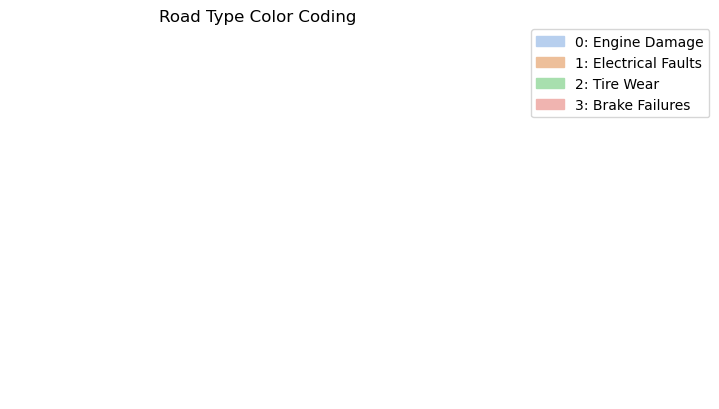

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Your color coding for road types
road_type_colors = {
    "0: Engine Damage": "#b7cfee",
    "1: Electrical Faults": "#edbf9a",
    "2: Tire Wear": "#a8dfae",
    "3: Brake Failures": "#f0b4b0",
    # Add more mappings as needed
}

# Create figure and axis for the plot
fig, ax = plt.subplots()

# Create a list of patches with the corresponding color and label for each road type
patches = [mpatches.Patch(color=color, label=road_type) for road_type, color in road_type_colors.items()]

# Add the patches to the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Set additional properties for aesthetics (optional)
plt.axis('off')  # Turn off the axis
plt.title("Road Type Color Coding")  # Add a title

plt.show()
